# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [236]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "../Resources/city_data.csv"
ride_data_to_load = "../Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



### Merge the DataFrames

In [237]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [238]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df["driver_count"].count()
total_rides

2375

In [239]:
# 2. Get the total drivers for each city type
city_type_rides = pyber_data_df.groupby(["type"]).count()["driver_count"]
city_type_rides

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [240]:
#  3. Get the total amount of fares for each city type
fares_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [241]:
#  4. Get the average fare per ride for each city type. 
average_fare_rider = fares_city_type / pyber_data_df.groupby(["type"]).count()["fare"]
average_fare_rider


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [242]:
# 5. Get the average fare per driver for each city type. 
drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
average_fair_driver = fares_city_type / city_data_df.groupby(["type"]).sum()["driver_count"]
average_fair_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [249]:
#  6. Create a PyBer summary DataFrame. 
pyber_df = pd.DataFrame({"Total Rides": city_type_rides, 
                            "Total Drivers": drivers,
                            "Total Fares": fares_city_type,
                            "Average Fare Per Ride": average_fare_rider,
                            "Average Fare Per Driver": average_fair_driver})


pyber_df


,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [250]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_df.index.name = None
pyber_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [251]:
#  8. Format the columns.
pyber_df["Total Rides"] = pyber_df["Total Rides"].map("{:,}".format)
pyber_df["Total Drivers"] = pyber_df["Total Drivers"].map("{:,}".format)
pyber_df["Total Fares"] = pyber_df["Total Fares"].map("${:,.2f}".format)
pyber_df["Average Fare Per Ride"] = pyber_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_df["Average Fare Per Driver"] = pyber_df["Average Fare Per Driver"].map("${:,.2f}".format)


pyber_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [233]:
## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [234]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [217]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_data_df = pyber_data_df.groupby(["type", "date"])
count_type_data = type_data_df.sum()["fare"]
count_type_data

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [218]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
count_type_data = count_type_data.reset_index()
count_type_data


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [219]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_data_pivot = count_type_data.pivot(index = "date", columns = "type", values = "fare")
type_data_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [220]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
locate_pivot = type_data_pivot.loc['2019-01-01':'2019-04-29']
locate_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [221]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
locate_pivot.index = pd.to_datetime(locate_pivot.index)

In [222]:
# 7. Check that the datatype for the index is datetime using df.info()
locate_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [223]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fare_per_area = locate_pivot.resample('W').sum()
weekly_fare_per_area.tail()

type,Rural,Suburban,Urban
date,,,
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


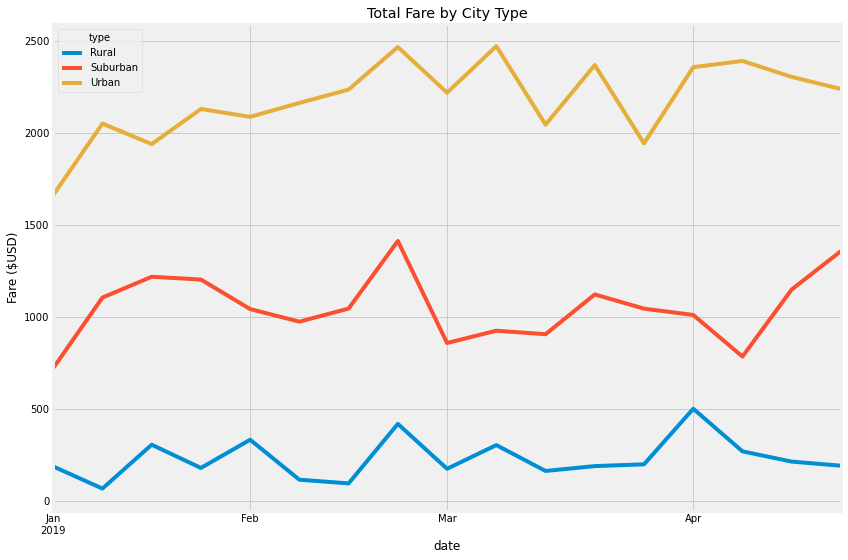

In [224]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
#area_vs_fare = weekly_fare_per_area.plot(figsize = (10,6))
#area_vs_fare.set_title("Total Fare by City Type")
#area_vs_fare.set_ylabel("Fare ($USD)")
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
weekly_fare_per_area.plot(ax=ax1)
ax1.set_ylabel('Fare ($USD)')
ax1.set_title('Total Fare by City Type')


# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.tight_layout()
#fig.set_size_inches(50,10)
plt.savefig("../analysis/PyBer_fare_summary.png")

plt.show()
